In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <center> **Suport Vector Machine** <center>

In [3]:
SVMDATA = pd.read_csv('/Users/thomasguerin/Desktop/FinalDataV3.csv')

[[44  3]
 [12 42]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.85        47
           1       0.93      0.78      0.85        54

    accuracy                           0.85       101
   macro avg       0.86      0.86      0.85       101
weighted avg       0.86      0.85      0.85       101

Train accuracy: 0.8425531914893617
Test accuracy: 0.8514851485148515
LOOCV Mean Accuracy: 0.8244


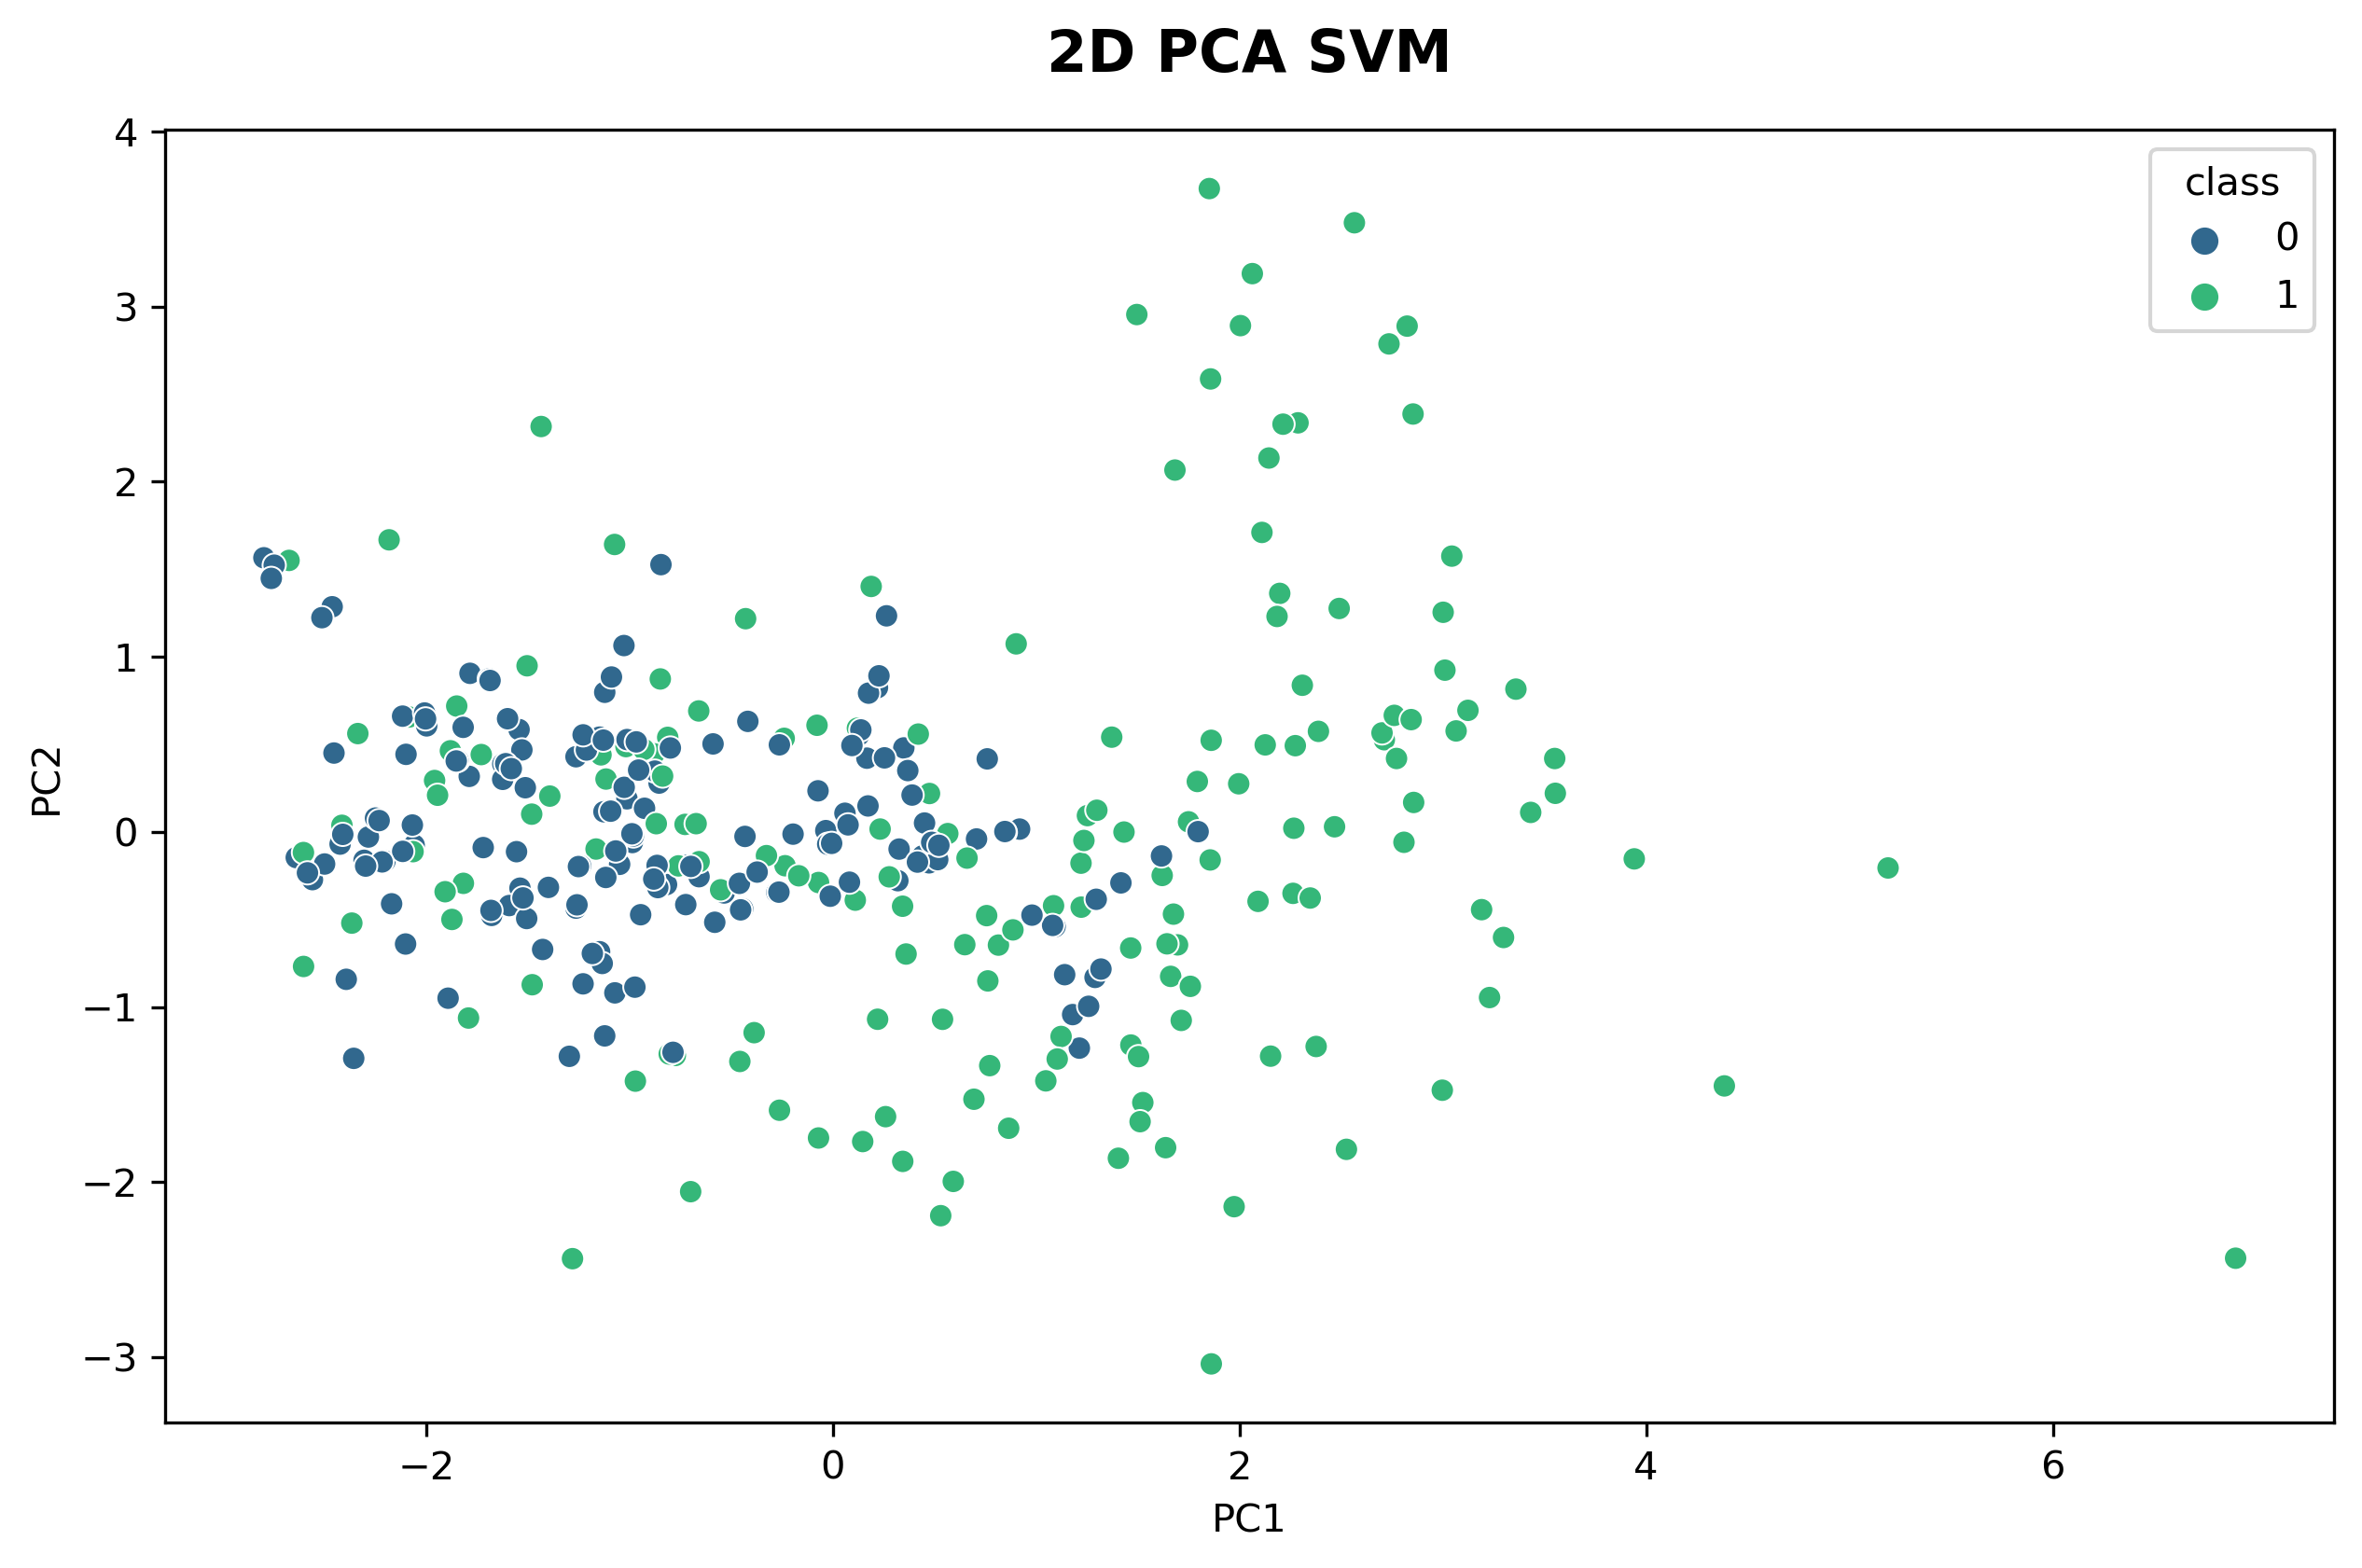

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.decomposition import PCA

X = SVMDATA.drop('class', axis=1)
y= SVMDATA['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_classifier = SVC(kernel='linear')  # linear(GOOD) rbf(MEH), poly(77 - 76), sigmoid(72-66)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_accuracy = svm_classifier.score(X_train, y_train)
test_accuracy = svm_classifier.score(X_test, y_test)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

loocv = LeaveOneOut()
loocv_scores = []
for train_index, test_index in loocv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm_classifier.fit(X_train, y_train)

    y_pred = svm_classifier.predict(X_test)

    loocv_scores.append(svm_classifier.score(X_test, y_test))

loocv_mean_score = sum(loocv_scores) / len(loocv_scores)
print(f'LOOCV Mean Accuracy: {loocv_mean_score:.4f}')

# 2D pca and vislaisation of SVM with class sepratation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca['class'] = y

plt.figure(figsize=(10, 6), dpi=300)
sns.scatterplot(x='PC1', y='PC2', data=X_pca, hue='class', palette='viridis')
plt.title('2D PCA SVM', fontsize=15, weight='bold', pad=15)
plt.show()




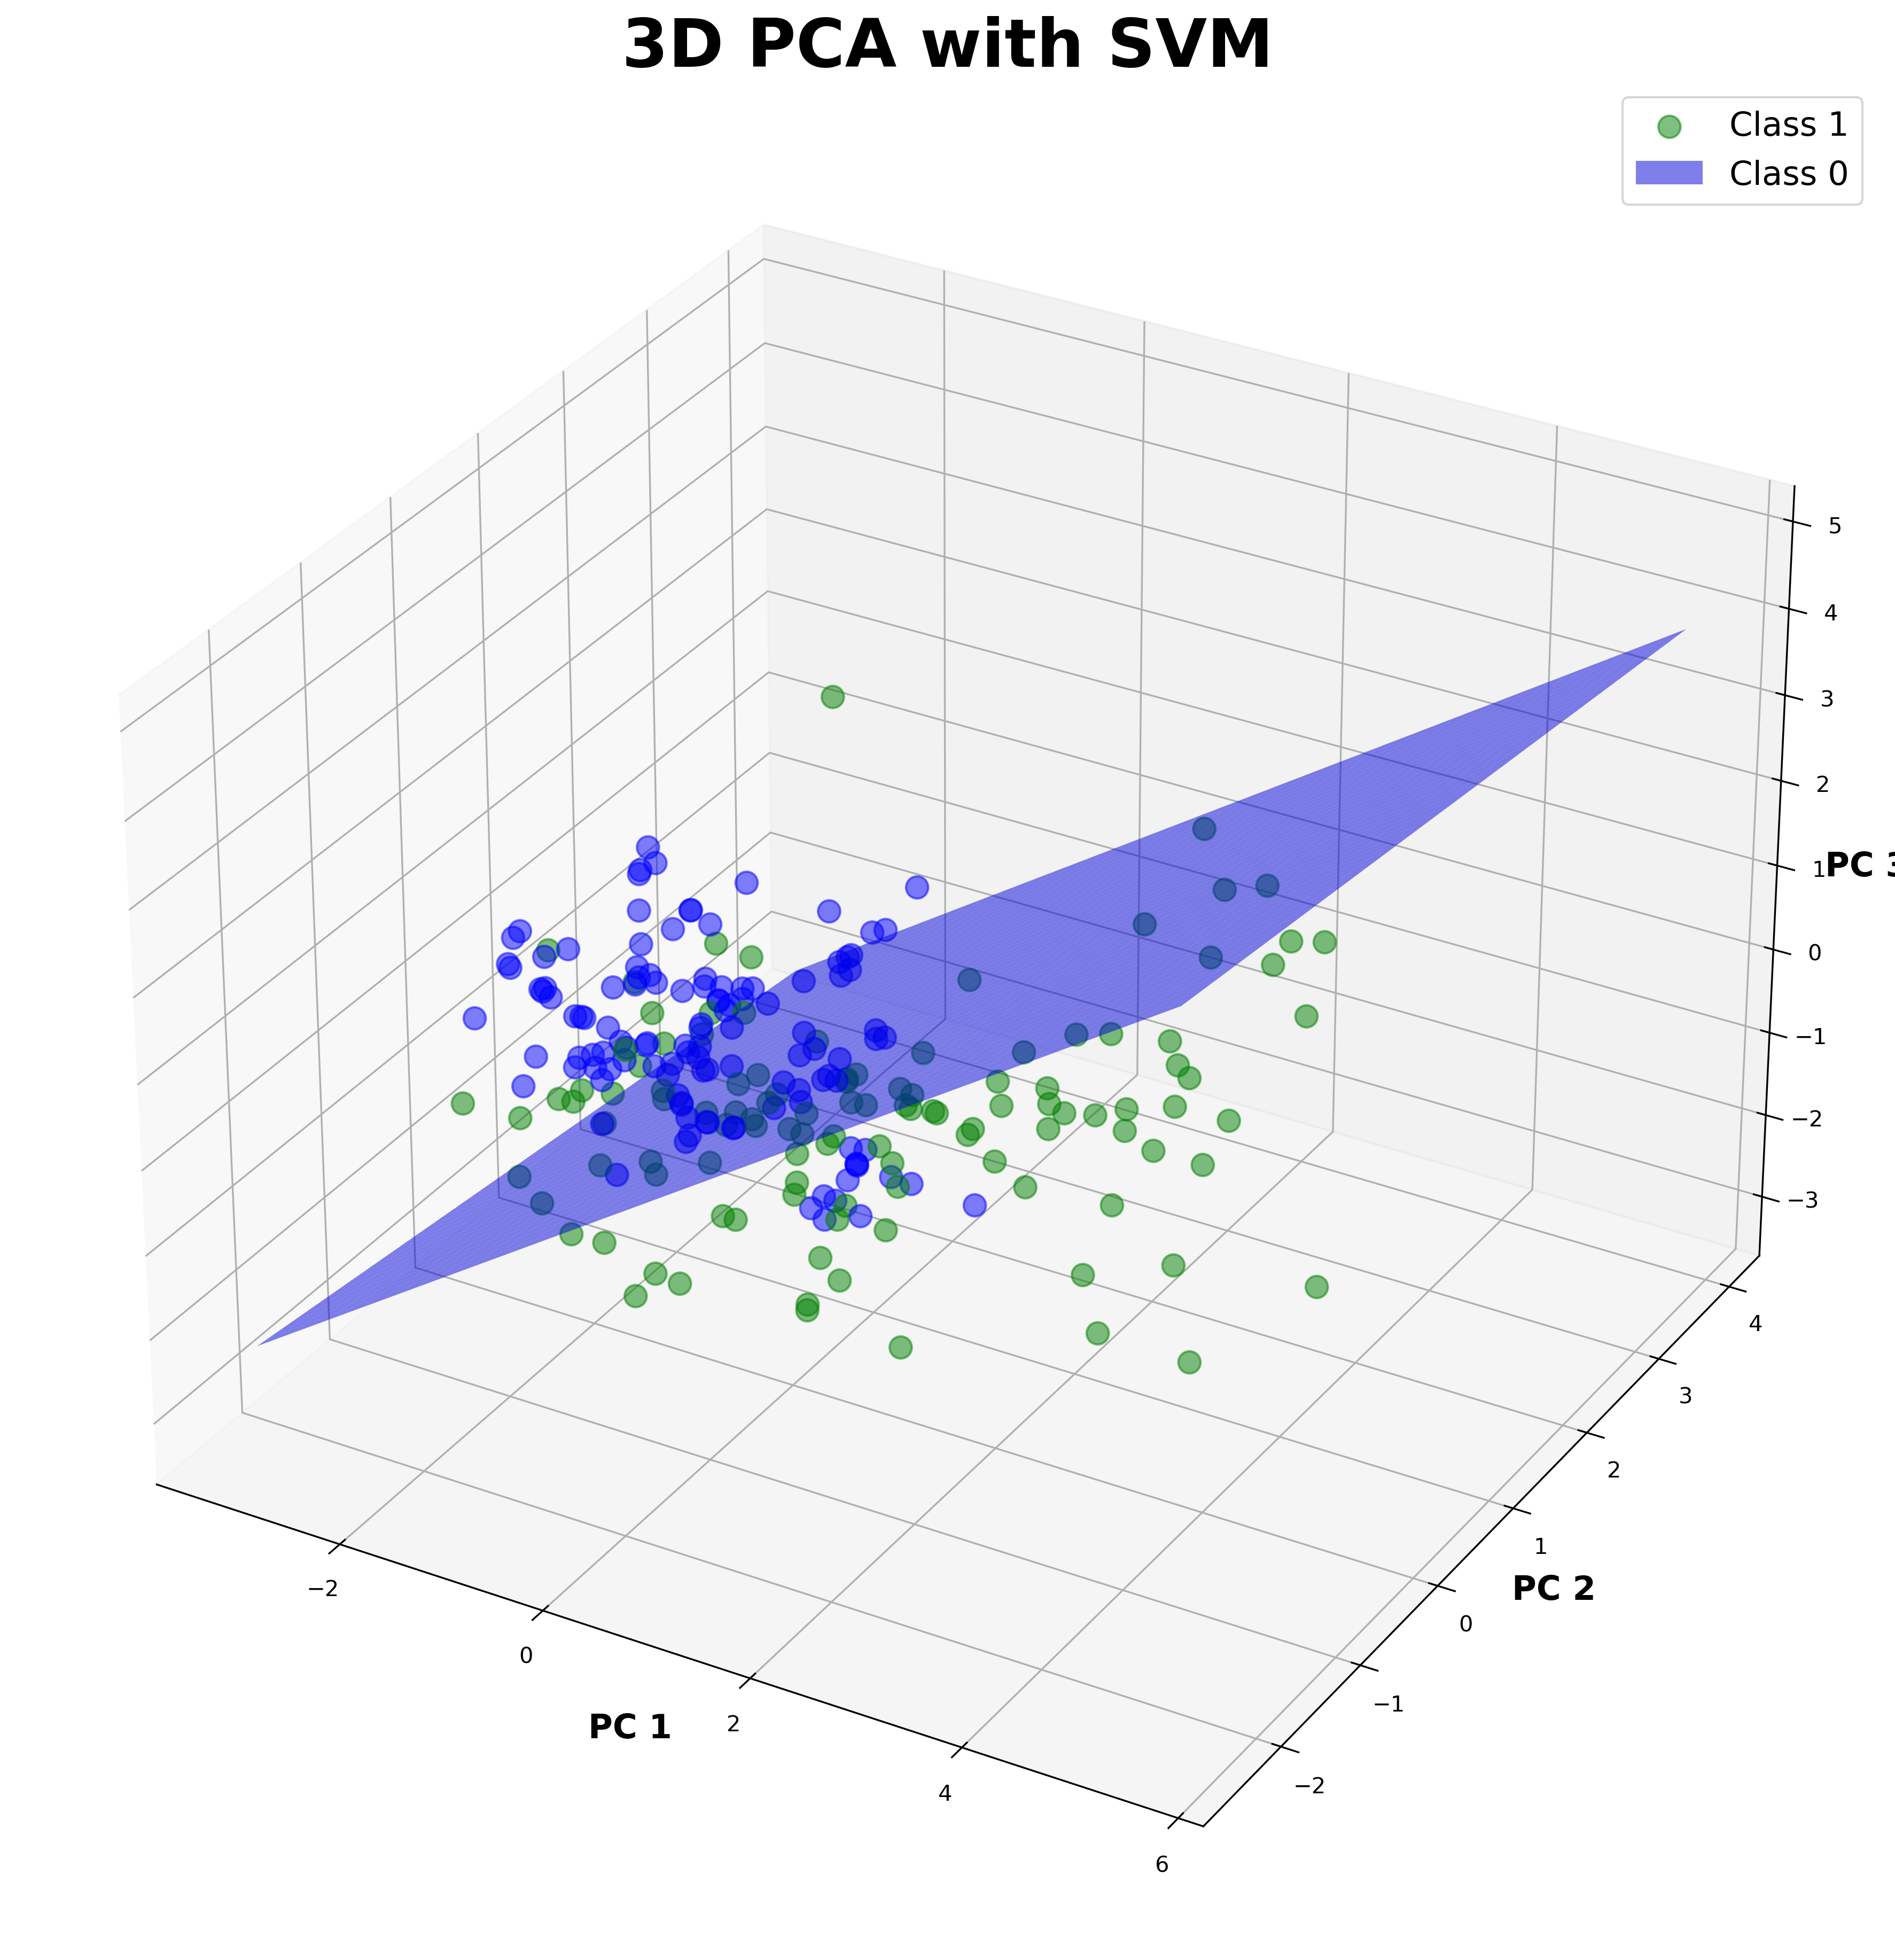

In [93]:
# PCA to reduce the data to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

svm_classifier.fit(X_train_pca, y_train)

# Plot the 3D data points and the hyperplane
fig = plt.figure(figsize=(15, 25), dpi=300)
ax = fig.add_subplot(111, projection='3d')
colors = ['g' if c else 'b' for c in y_train]

ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=colors, marker='o', alpha=0.5, s=100)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

zz = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j], zz[i, j]]).reshape(1, -1)
        zz[i, j] = -(svm_classifier.intercept_[0] + svm_classifier.coef_[0][0] * point[0][0] + svm_classifier.coef_[0][1] * point[0][1]) / svm_classifier.coef_[0][2]

    
ax.plot_surface(xx, yy, zz, color='b', alpha=0.5)
plt.title('3D PCA with SVM', fontsize=30, fontweight='bold')
ax.set_xlabel('PC 1', fontsize=15, fontweight='bold')
ax.set_ylabel('PC 2', fontsize=15, fontweight='bold')
ax.set_zlabel('PC 3', fontsize=15, fontweight='bold')
plt.legend(['Class 1', 'Class 0'], loc='upper right', fontsize=15)
plt.show()


# <center> **Cosine K-Mediods Clustering** <center>

In [7]:
data = pd.read_csv('/Users/thomasguerin/Desktop/FinalDataV3.csv')

In [8]:
from sklearn.cluster import KMeans

features = data.drop('class', axis=1)

inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)



/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

In [9]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca_features = pca.fit_transform(features)

In [122]:
# K MEDIODS clustering with cosine distance on pca features
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3, metric='cosine', random_state=42, init='k-medoids++')
kmedoids.fit(pca_features)
clusters = kmedoids.predict(pca_features)

from sklearn.metrics import silhouette_score
print(silhouette_score(pca_features, clusters, metric='cosine'))

from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(pca_features, clusters))

cluster_counts = pd.DataFrame({'cluster': clusters, 'class': y}).groupby(['cluster', 'class']).size().reset_index(name='count')

print(cluster_counts)




0.5796473203636437
167.57045267769226
   cluster  class  count
0        0      0    106
1        0      1     47
2        1      0     30
3        1      1    109
4        2      0     32
5        2      1     12


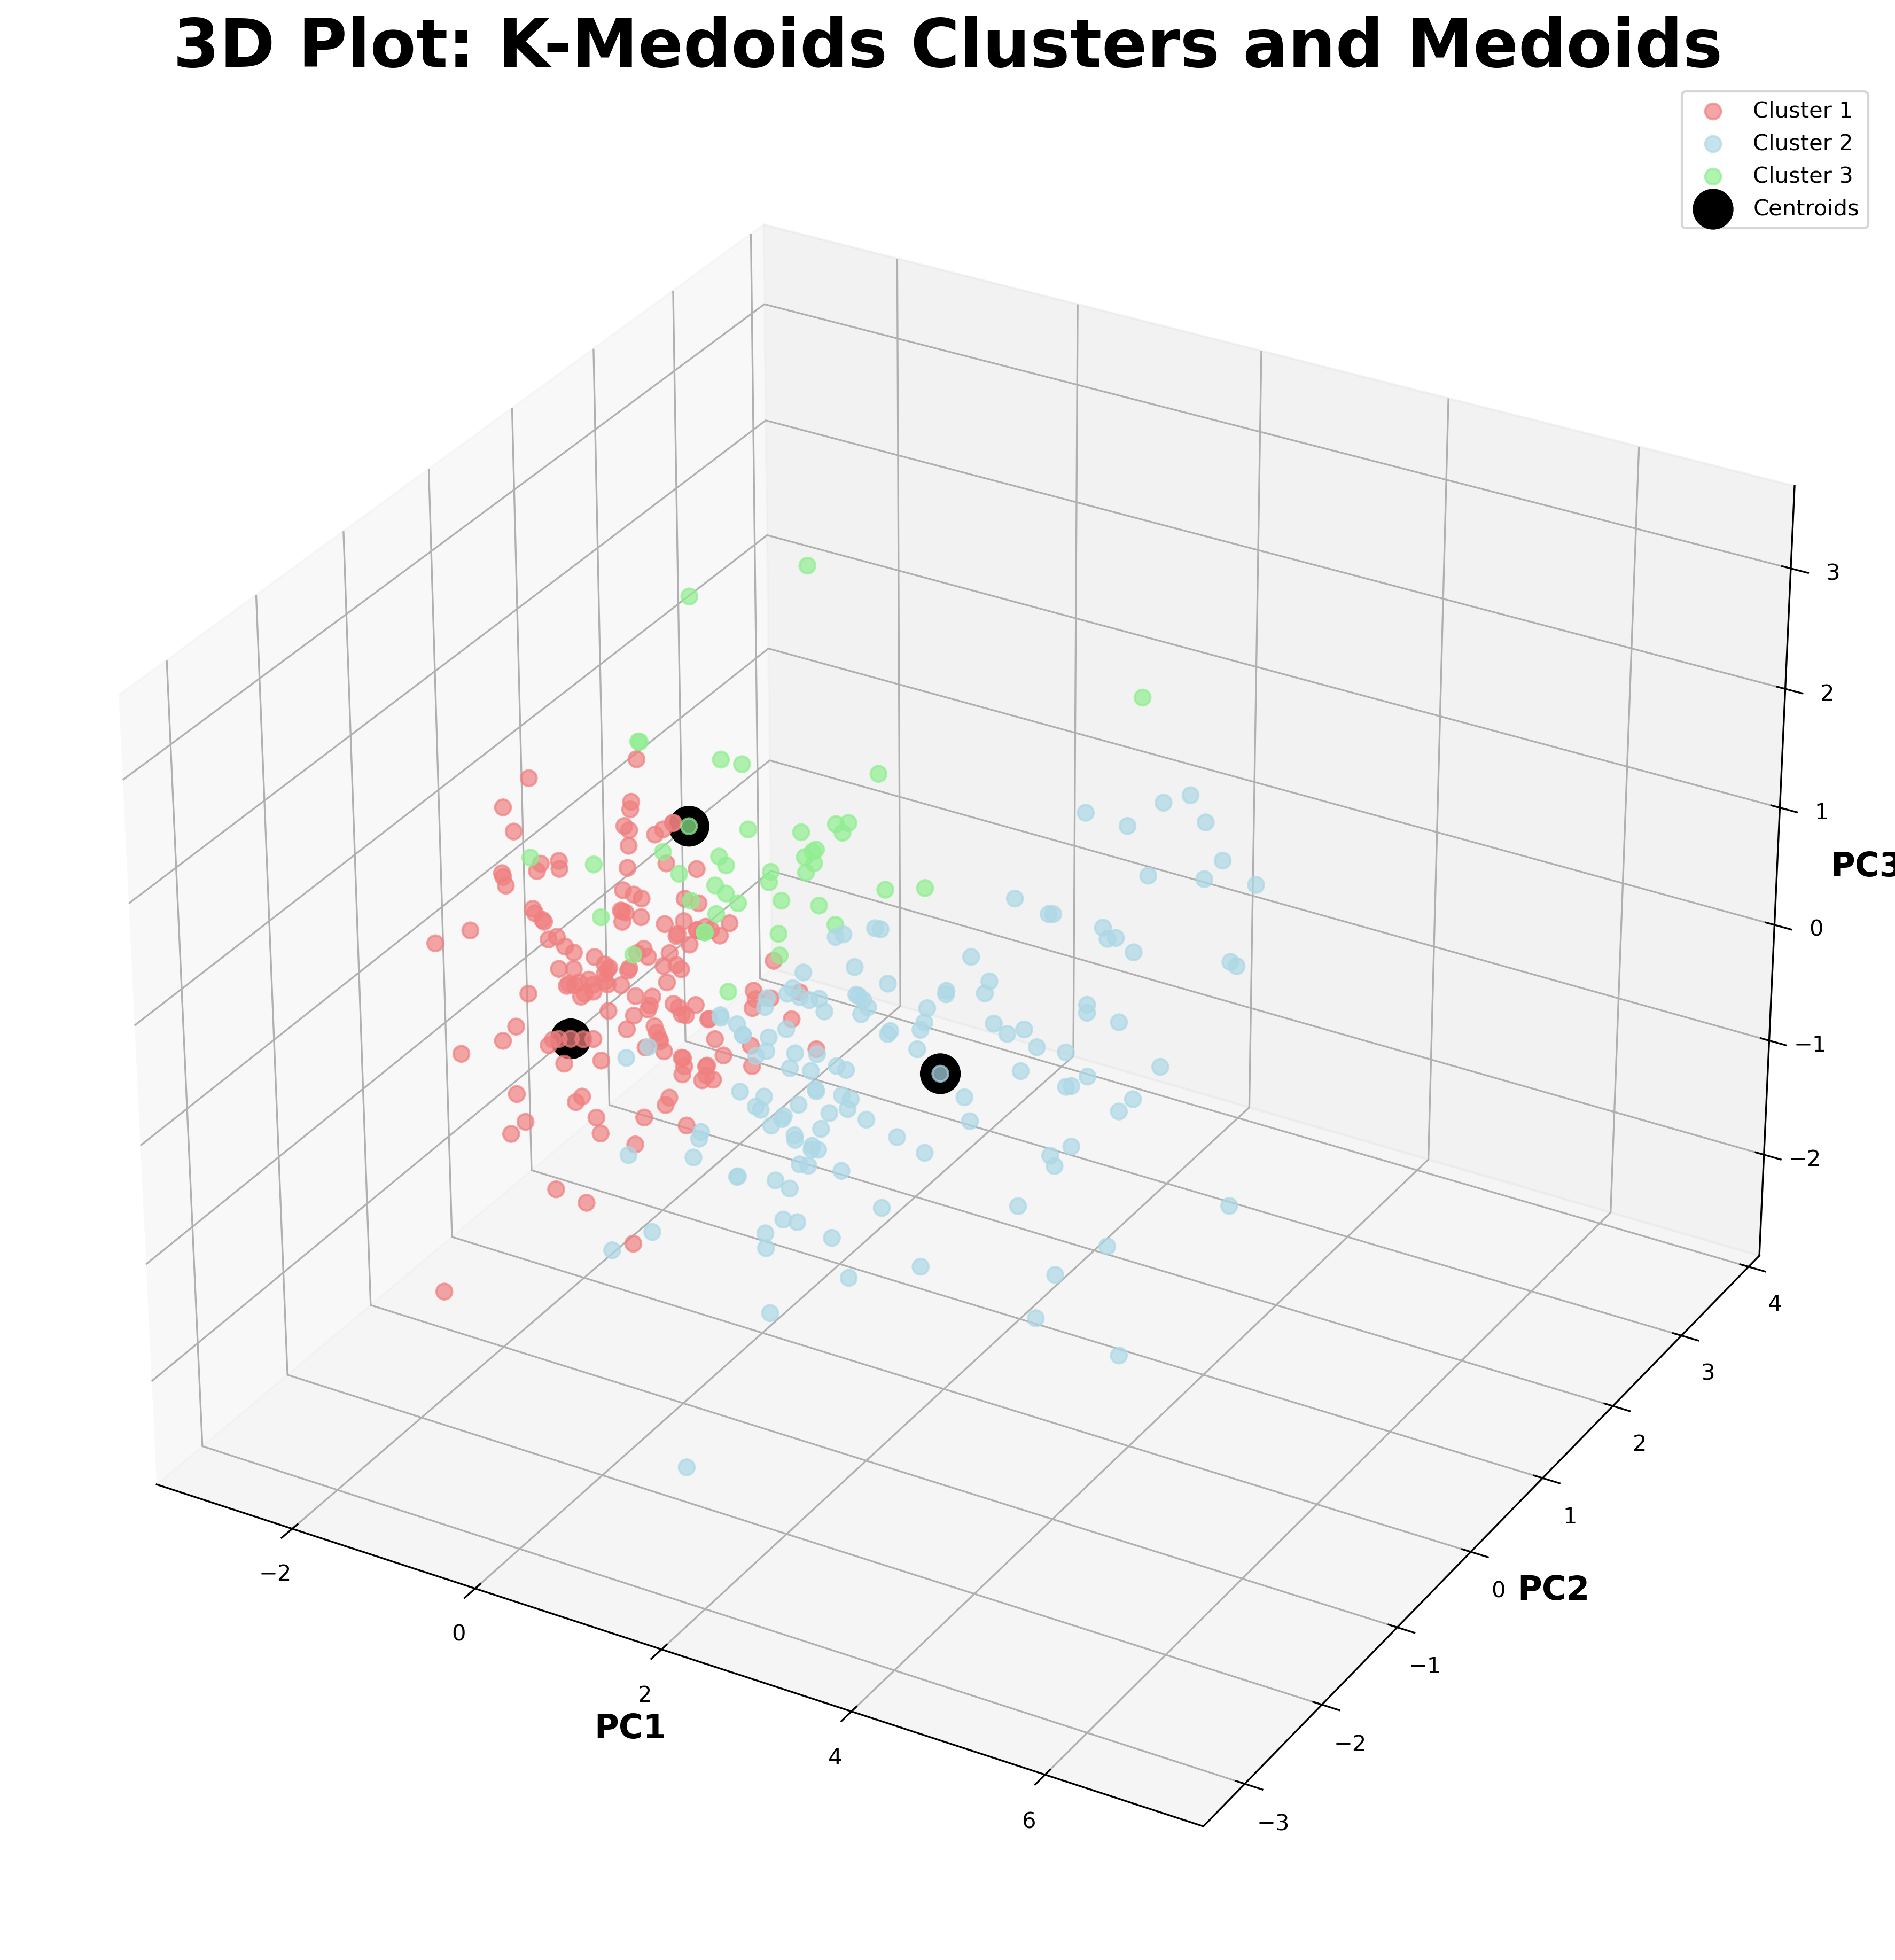

In [107]:
fig = plt.figure(figsize=(15, 25), dpi=300)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_features[clusters == 0, 0], pca_features[clusters == 0, 1], pca_features[clusters == 0, 2], c='lightcoral', label='Cluster 1', marker='o', s=50, alpha=0.7) 
ax.scatter(pca_features[clusters == 1, 0], pca_features[clusters == 1, 1], pca_features[clusters == 1, 2], c='lightblue', label='Cluster 2', marker='o', s=50, alpha=0.7)
ax.scatter(pca_features[clusters == 2, 0], pca_features[clusters == 2, 1], pca_features[clusters == 2, 2], c='lightgreen', label='Cluster 3', marker='o', s=50, alpha=0.7)

ax.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], kmedoids.cluster_centers_[:, 2], c='black', label='Centroids', marker='o', s=300, alpha=1)

ax.set_title('3D Plot: K-Medoids Clusters and Medoids', fontsize=30, fontweight='bold')
ax.set_xlabel('PC1', fontsize=15, fontweight='bold')
ax.set_ylabel('PC2', fontsize=15, fontweight='bold')
ax.set_zlabel('PC3', fontsize=15, fontweight='bold')
ax.legend()
plt.show()


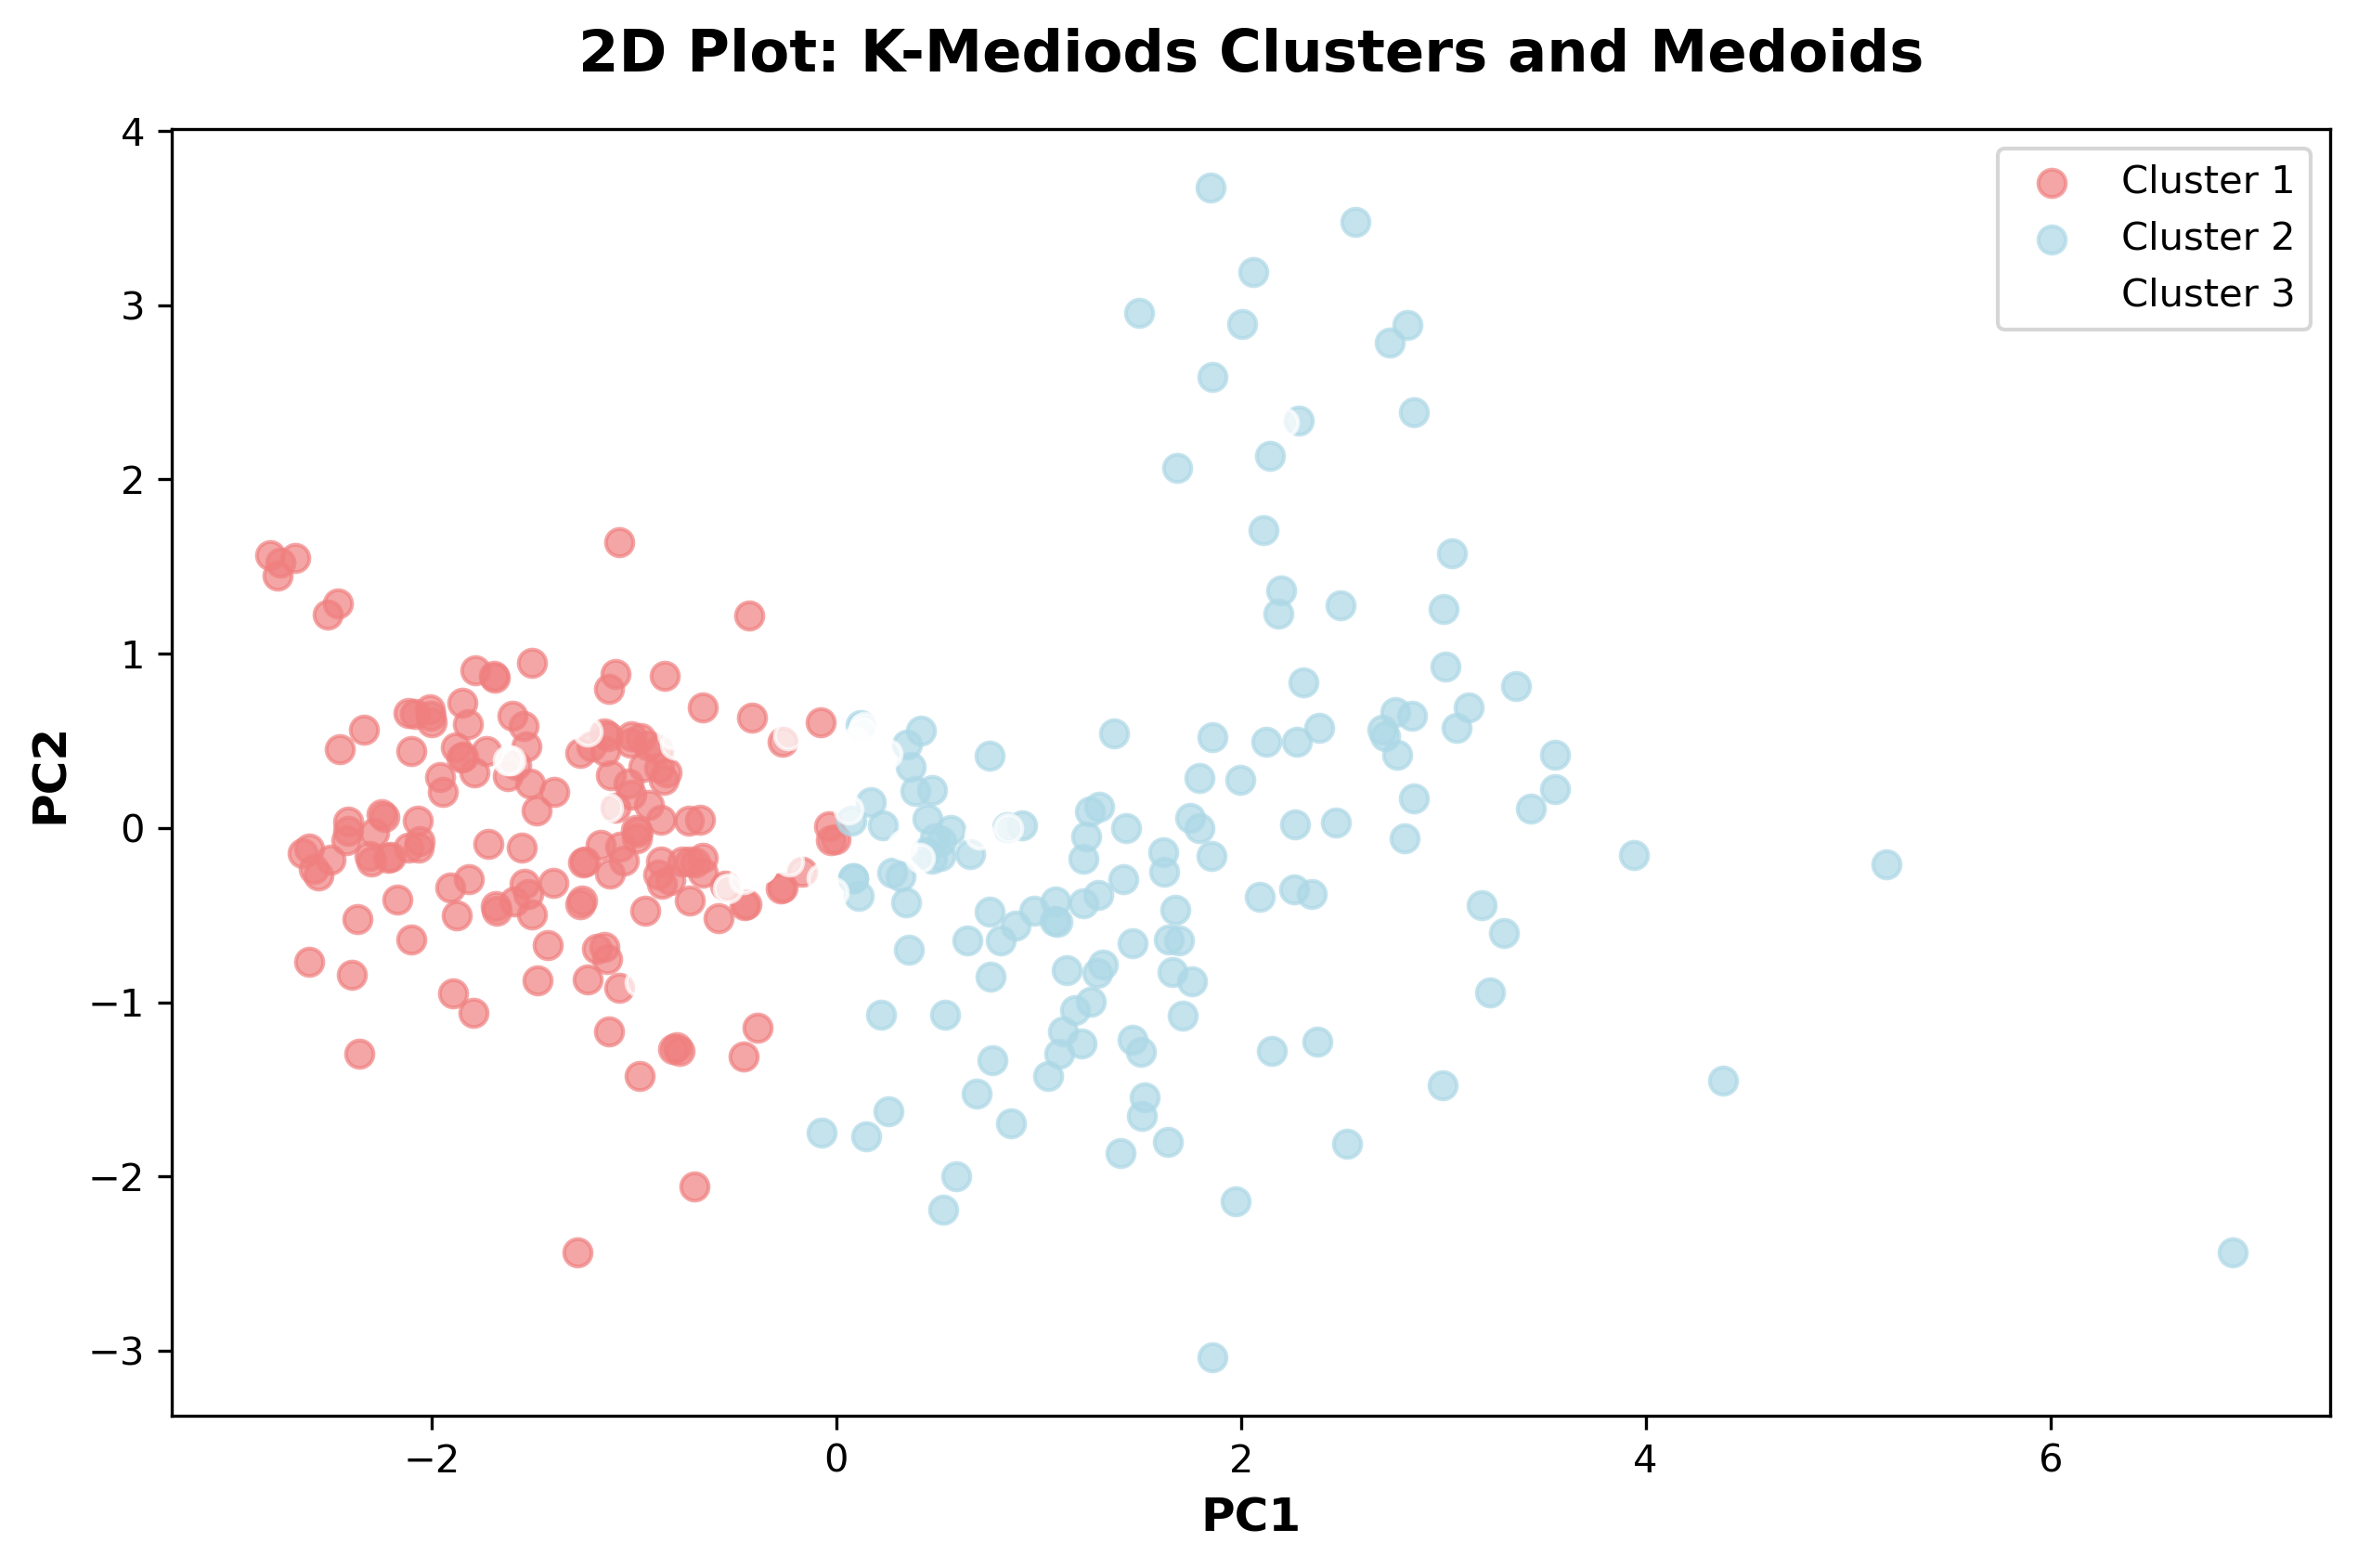

In [111]:
plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(pca_features[clusters == 0, 0], pca_features[clusters == 0, 1], c='lightcoral', label='Cluster 1', marker='o', s=50, alpha=0.7)
plt.scatter(pca_features[clusters == 1, 0], pca_features[clusters == 1, 1], c='lightblue', label='Cluster 2', marker='o', s=50, alpha=0.7)
plt.scatter(pca_features[clusters == 2, 0], pca_features[clusters == 2, 1], c='white', label='Cluster 3', marker='o', s=50, alpha=0.7) # switch to white to prove point
#plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], c='black', label='Centroids', marker='o', s=100, alpha=1)
plt.title('2D Plot: K-Mediods Clusters and Medoids', fontsize=15, weight='bold', pad=15)
plt.xlabel('PC1', fontsize=12, weight='bold')
plt.ylabel('PC2', fontsize=12, weight='bold')
plt.legend()
plt.show()


# this shwos there is a third cluster, going beyond the mentionned 2 classes 
# as there is a good linear separation between C1 and C2 (chaning clour of other cluster to show this)


/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster   0    1   2
class               
0        54  114   0
1        70   46  52


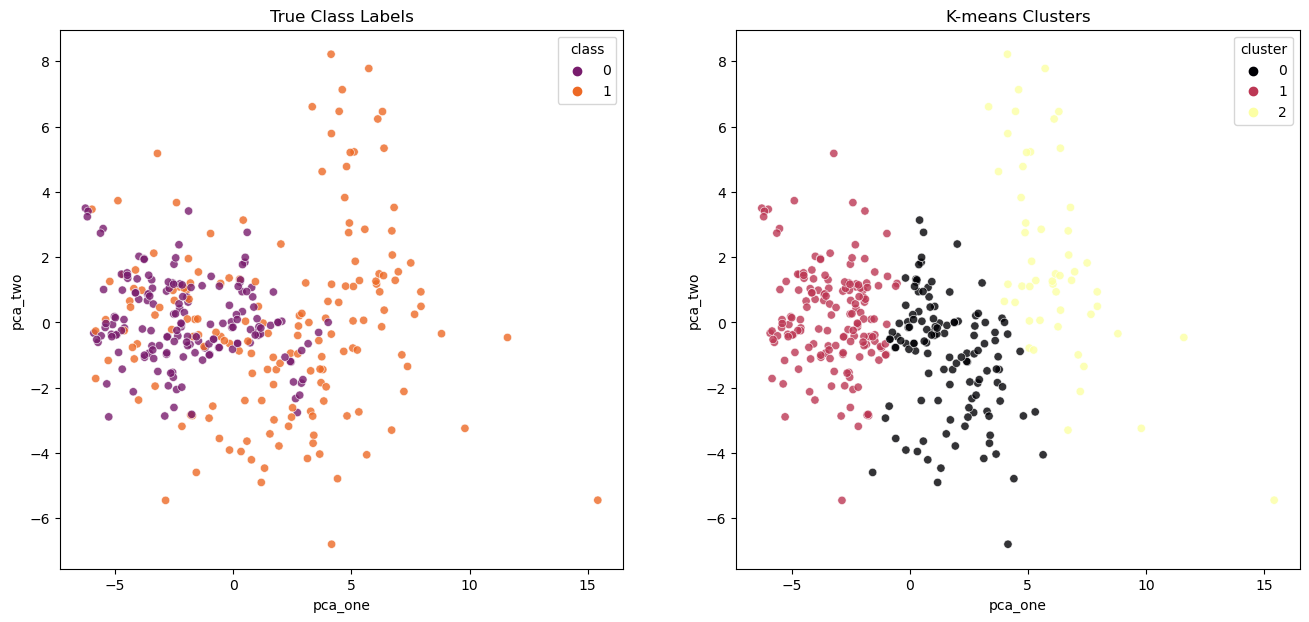

In [30]:
from sklearn.metrics import confusion_matrix, classification_report


kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(pca_features)

contingency_table = pd.crosstab(data['class'], data['cluster'])
print(contingency_table)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.drop(['class', 'cluster'], axis=1))
data['pca_one'] = pca_result[:,0]
data['pca_two'] = pca_result[:,1]

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x='pca_one', y='pca_two', hue='class', data=data, palette='inferno', legend="full", alpha=0.8)
plt.title('True Class Labels')

plt.subplot(1, 2, 2)
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=data, palette='inferno', legend="full", alpha=0.8)
plt.title('K-means Clusters')

plt.show()

all the overlap in the true class labels confirms the existence of a third cluster

\begin{equation}
\begin{aligned}
& \underset{w, b, \xi}{\text{minimise}}
& & \frac{1}{2} \| w \|^2 + C \sum_{i=1}^{n} \xi_i \\
& \text{subject to}
& & y_i (w^T \phi(x_i) + b) \geq 1 - \xi_i, \\
&&& \xi_i \geq 0, \; i = 1, \dots, n.
\end{aligned}
\end{equation}

